In [23]:
import numpy as np
from matplotlib import pylab as plt
from skimage import transform

In [24]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

### Данные:
Будем работать с датасетом [Boston Housing Prices](https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef).

Text(0.5,0,'Price')

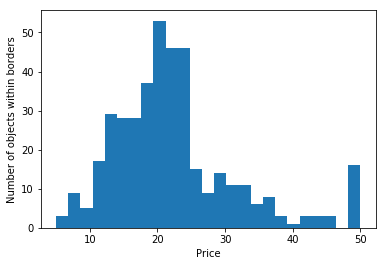

In [25]:
plt.hist(y_train, bins=25)
plt.ylabel('Number of objects within borders')
plt.xlabel('Price')

### Задание.
Будем решать задачу регрессии. Целевая переменная -- цена дома, признаки - различная информация о домохозяйстве. Для решения будем использовать линейную регрессию. Ваша задача - оценить качество решения в зависимости от количества объектов в обучающей выборке. Качество решения будем оценивать с помощью среднеквадратичной и среднеабсолютной ошибки, а так же [коэффициента детерминации $r^2$](http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination). Также требуется оценить дисперсию данных функционалов в зависимости от числа объектов в обучающей выборке. 

*Обращаем ваше внимание, что для качественной оценки данных зависимостей эксперименты для каждого размера выборки стоит повторять многократно на различных случайных подвыборках.*

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

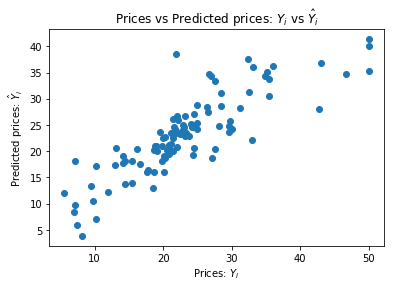

In [27]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [28]:
print('mae = {}'.format(mean_absolute_error(y_test, y_pred)))
print('mse = {}'.format(mean_squared_error(y_test, y_pred)))
print('prediction variance = {}'.format(np.std((y_test - y_pred)**2)))

mae = 3.464185812406724
mse = 23.195599256422998
prediction variance = 45.78048685033721


## processing

In [56]:
cycles = 1000 # number of averaging cycles
number_features = X_train.shape[1] # number of features
mae_array = np.zeros(number_features)

for i in range(number_features):
    for j in range(cycles):
        rand_samples = np.random.choice(np.arange(number_features), size=i+1, replace=False)
        (X_train_part, X_test_part) = (X_train[:,rand_samples], X_test[:,rand_samples])
        
        lm.fit(X_train_part, y_train)
        y_pred = lm.predict(X_test_part)
        
        mae_array[i] += mean_absolute_error(y_test, y_pred)
        
    mae_array[i] /= cycles

std = np.std(mae_array)

## mean absolute error

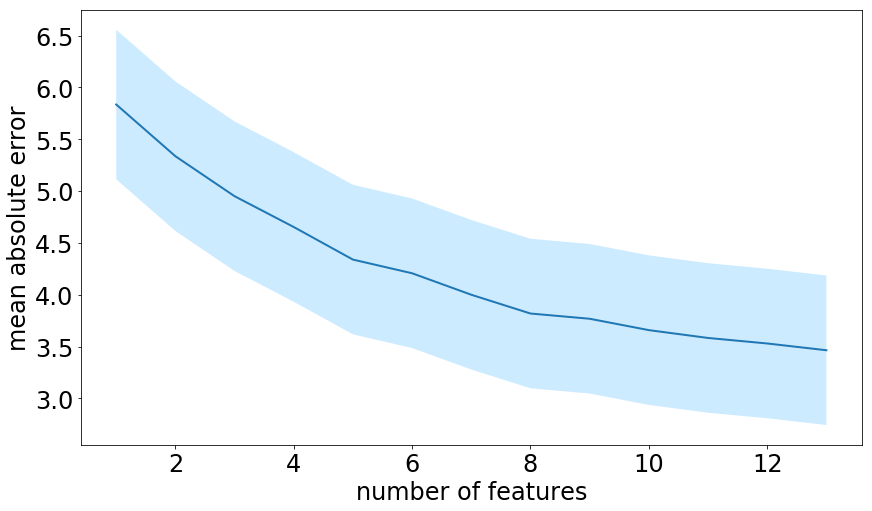

In [66]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
plt.figure(figsize=(14,8))

plt.plot(np.arange(1, number_features+1), mae_array)
plt.fill_between(np.arange(1, number_features+1), mae_array-std, mae_array+std,
                 alpha = 0.2, facecolor='#089FFF')
plt.xlabel("number of features")
plt.ylabel("mean absolute error")
plt.show()